In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data=pd.read_csv(r'ds3_train.csv')

In [71]:
data

,t,x_1,x_2,y
0,0.0,-1.548319,-2.762987,0
1,0.0,-3.958870,-0.612780,0
2,0.0,-2.276375,0.614934,0
3,0.0,0.556287,-3.931406,0
4,0.0,-1.491000,-2.159297,0
...,...,...,...,...
1245,1.0,1.773462,3.542156,0
1246,1.0,1.220733,3.636613,1
1247,1.0,1.107772,1.625893,0
1248,1.0,1.461093,0.558899,0


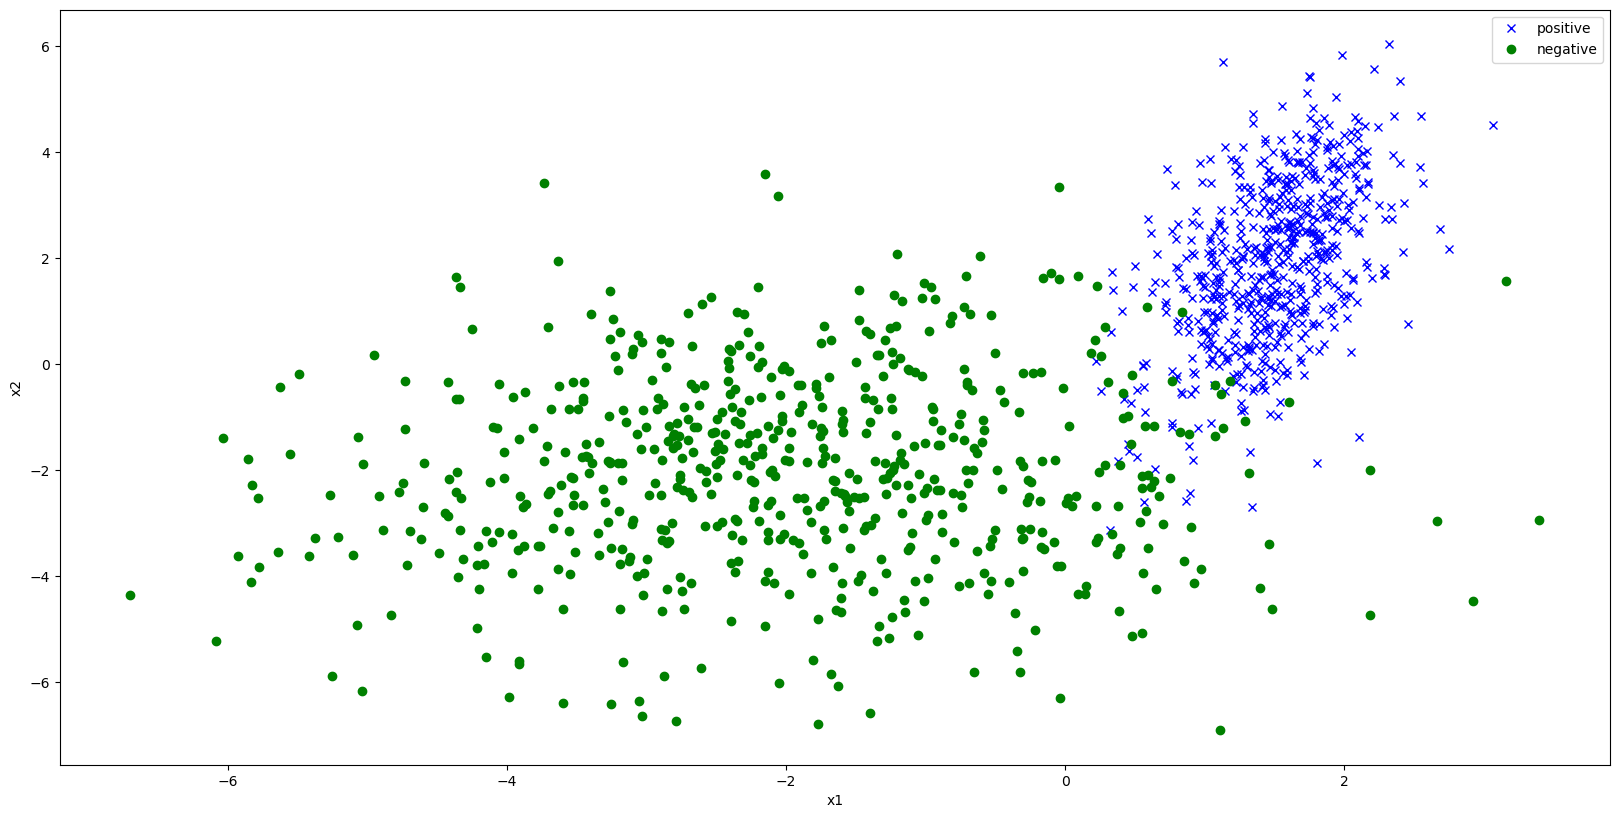

In [76]:
##################################################plotting the dataset##########################################################

x_train=data.loc[:,['x_1','x_2']]
t_train=data.loc[:,['t']]

ind=t_train[t_train['t']==1].index.tolist()
ind1=t_train[t_train['t']==0].index.tolist()

xx=x_train[['x_1']].values
xx1=x_train[['x_2']].values

x_1_mod=xx[ind,:]
x_1_mod1=xx[ind1,:]

x_2_mod=xx1[ind,:]
x_2_mod1=xx1[ind1 ,:]

plt.figure(figsize=(20,10),dpi=100)
plt.plot(x_1_mod,x_2_mod,'bx',linewidth=1)
plt.plot(x_1_mod1,x_2_mod1,'go',linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['positive','negative'])
plt.show()

xv=x_train.values
colsx=x_train.shape[0]
zer=np.ones((colsx,1))
x_train_new=np.hstack((zer,xv))

In [77]:
#####################################################FITTING THE MODEL##########################################################





itera=0
col_x=(x_train_new.shape[1])
theta1=np.zeros((col_x,1))
all_theta=[]
while itera<100000:
    theta=theta1
    all_theta.append(theta)
    htheta=1/(1+(np.exp(-1*((x_train_new)@theta))))
    del_ltheta=(x_train_new.T)@((t_train.values)-htheta)
    H=((htheta.T).dot((htheta-1)))*((x_train_new.T)@x_train_new)
    H_inv=np.linalg.inv(H)
    theta1=theta-(H_inv@del_ltheta)
    

    #if np.linalg.norm((theta1-theta),ord=1)< 1e-5:
         #break
        
    
    itera+=1

theta=theta1


t_pred=1/(1+(np.exp(-1*((x_train_new)@theta))))

t_pred_new=np.where(t_pred>=0.5,1,0)



error=np.absolute(t_train.values-t_pred_new)
accuracy=100-((np.mean(error))*100)

accuracy

96.32

In [78]:
data_test=pd.read_csv(r'ds3_test.csv')


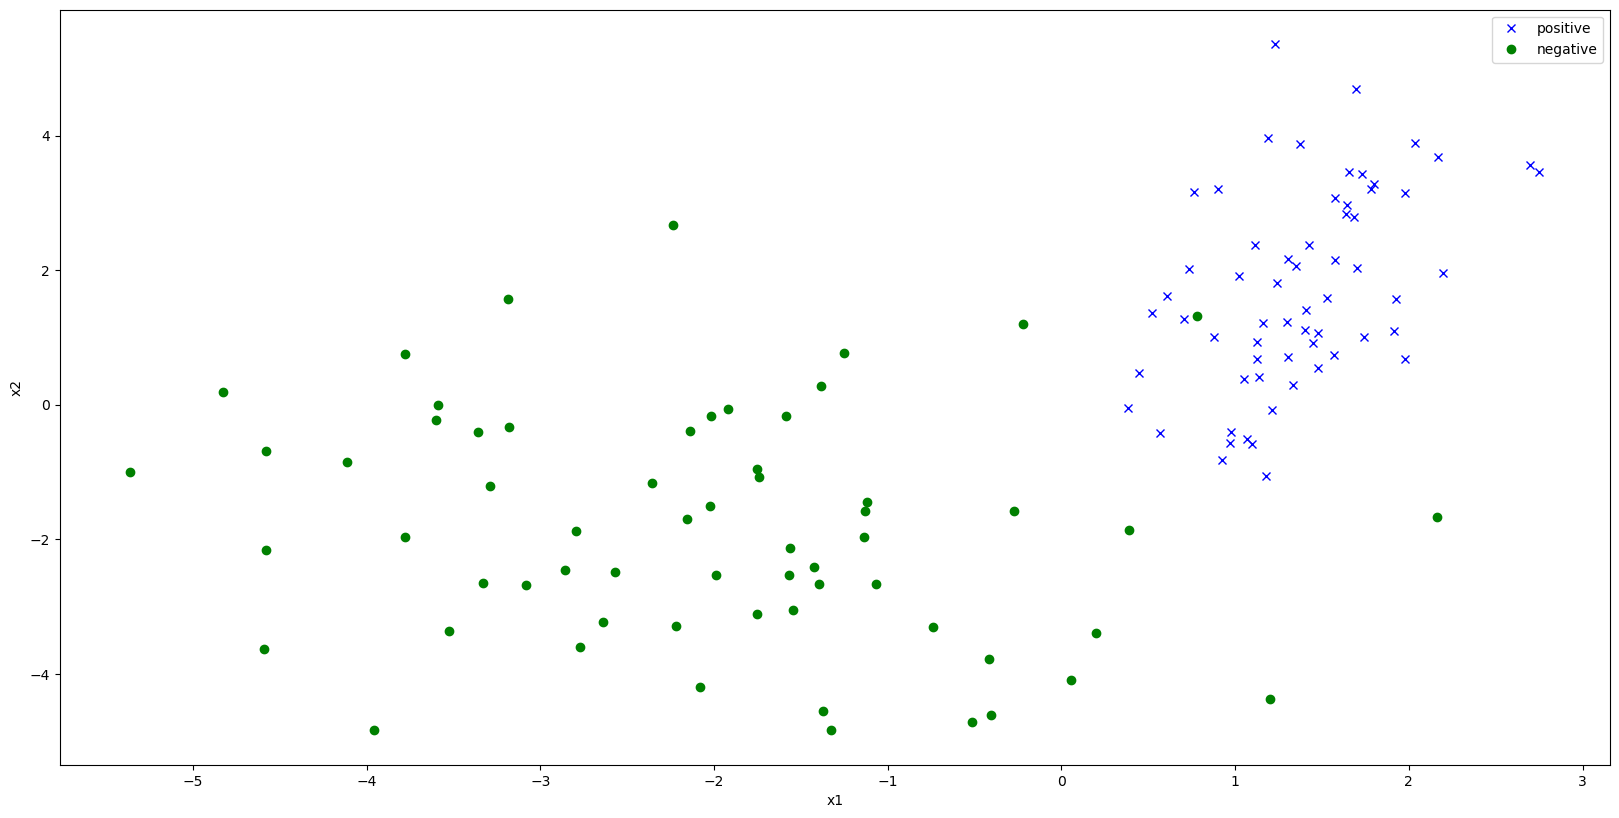

In [79]:
##########################################plotting the test dataset#############################################################

x_test=data_test.loc[:,['x_1','x_2']]
t_test=data_test.loc[:,['t']]

ind_test=t_test[t_test['t']==1].index.tolist()
ind1_test=t_test[t_test['t']==0].index.tolist()

xx_test=x_test[['x_1']].values
xx1_test=x_test[['x_2']].values

x_1_mod_test=xx_test[ind_test,:]
x_1_mod1_test=xx_test[ind1_test,:]

x_2_mod_test=xx1_test[ind_test,:]
x_2_mod1_test=xx1_test[ind1_test,:]

plt.figure(figsize=(20,10),dpi=100)
plt.plot(x_1_mod_test,x_2_mod_test,'bx',linewidth=1)
plt.plot(x_1_mod1_test,x_2_mod1_test,'go',linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['positive','negative'])
plt.show()

xv_test=x_test.values
colsx_test=x_test.shape[0]
zer_test=np.ones((colsx_test,1))
x_test_new=np.hstack((zer_test,xv_test))

In [80]:
t_pred_test=1/(1+(np.exp(-1*((x_test_new)@theta))))

t_pred_new_test=np.where(t_pred_test>=0.5,1,0)



error_test=np.absolute(t_test.values-t_pred_new_test)
accuracy_test=100-((np.mean(error_test))*100)

accuracy_test

98.38709677419355

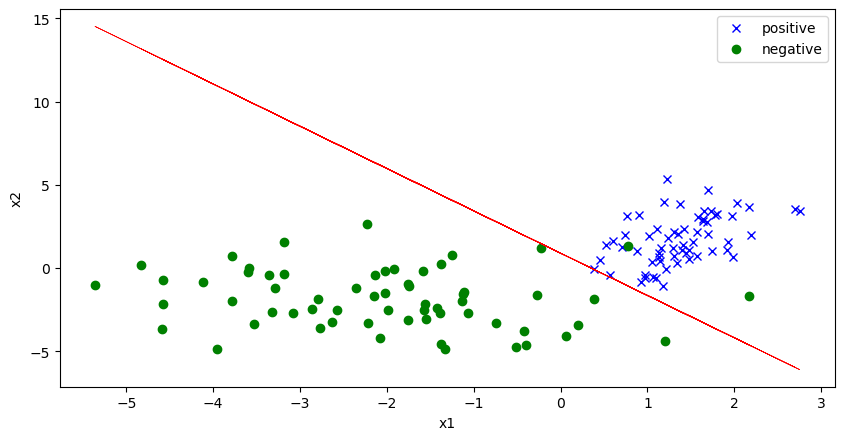

In [82]:
###############################################fitting the model################################################################

x2=(-1*(theta[0]/theta[2]))+(-1*((theta[1]/theta[2])*xx_test))


f=plt.figure(figsize=(10,5),dpi=100)
plt.plot(x_1_mod_test,x_2_mod_test,'bx',linewidth=1)
plt.plot(x_1_mod1_test,x_2_mod1_test,'go',linewidth=0.5)
plt.plot(xx_test,x2,'r',linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['positive','negative'])
plt.show()
f.savefig('prob_2c_data1_pred.png')